In [8]:
import pandas as pd
from pandas_ods_reader import read_ods
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mapclassify
from difflib import get_close_matches 

# Education Ranking

### Pisa data for mathematics

In [86]:
import os

fp = os.path.join('Pisa_Ranking', 'pisa_ranking.ods')

df = read_ods(fp,1,columns=['Index','Country','Avg_score'])
df.columns
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      79 non-null     float64
 1   Country    79 non-null     object 
 2   Avg_score  79 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.0+ KB


In [27]:
df.drop(columns='Index',inplace= True )
# Cleaning the names of assembly constituencies
df['Country']=df['Country'].str.lower()
df['Country']=df['Country'].str.strip()
df.head()

,Country,Avg_score
0,china,591.0
1,singapore,569.0
2,macau,558.0
3,hong kong,551.0
4,taiwan,531.0


### Data for world map

In [28]:
fp = 'Country_map'
map_df = gpd.read_file(fp)
map_df=map_df.rename(columns={"SOVEREIGNT": "country", "geometry": "geometry"})
map_df = map_df[['country','geometry']]
map_df['country']=map_df['country'].str.lower()
map_df['country']=map_df['country'].str.strip()



map_df.head()
#map_df.columns
#map_df[map_df['country']=='S'].index

#map_df['SOVEREIGNT'][232]
#map_df.plot(column='country',figsize=(15,10))

,country,geometry
0,netherlands,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,afghanistan,"POLYGON ((71.04980 38.40866, 71.05714 38.40903..."
2,angola,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,united kingdom,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,albania,"POLYGON ((19.74777 42.57890, 19.74601 42.57993..."


### Changing country names on the map data

In [29]:
get_close_matches('united states of america', map_df['country'].values,cutoff=0.4,n=10)


['united states of america',
 'united states of america',
 'united states of america',
 'united states of america',
 'united states of america',
 'united states of america',
 'united states of america',
 'federated states of micronesia',
 'united republic of tanzania',
 'united arab emirates']

In [30]:

map_df[map_df['country']=='macedonia'].index
map_df['country'][210]='serbia'
map_df['country'][148]='north macedonia'
map_df[map_df['country']=='czechia'].index
map_df['country'][60]='czech republic'
#map_df[map_df['country']=='republic of the congo'].index
#map_df['country'][48]='congo'
map_df[map_df['country']=='united republic of tanzania'].index
map_df['country'][233]='tanzania'


/home/vasanth/anaconda3/envs/DS/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/vasanth/anaconda3/envs/DS/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/vasanth/anaconda3/envs/DS/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [31]:
map_df['country'].drop_duplicates(inplace=True)
map_df.reset_index(drop=True,inplace=True)

### changing country names on pisa data

In [32]:
df[df['Country']=='united states'].index
df['Country'].iloc[37] = 'united states of america'
df[df['Country']=='serbia'].index
df['Country'].iloc[46]


/home/vasanth/anaconda3/envs/DS/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


'serbia'

### Countries that don't match

In [33]:
Not_matching = []
def matching_country(name,country_list=map_df['country'].values):
    if  name not in country_list:
       # print(name)
        Not_matching.append(name)
            #return Not_matching
  

In [34]:
df['Country'].apply(lambda x: matching_country(x))
Not_matching

['macau', 'hong kong']

### merging the pisa and world map data

In [35]:
merged = map_df.set_index('country').join(df.set_index('Country'))
merged['Avg_score'].fillna(300,inplace=True)
#type(merged['Avg_score'][0])
merged.dropna().info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 255 entries, afghanistan to zimbabwe
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   geometry   255 non-null    geometry
 1   Avg_score  255 non-null    float64 
dtypes: float64(1), geometry(1)
memory usage: 6.0+ KB


In [36]:
merged.describe

<bound method NDFrame.describe of                                                          geometry  Avg_score
afghanistan     POLYGON ((71.04980 38.40866, 71.05714 38.40903...      300.0
albania         POLYGON ((19.74777 42.57890, 19.74601 42.57993...      437.0
algeria         POLYGON ((8.60251 36.93951, 8.60566 36.91305, ...      300.0
andorra         POLYGON ((1.70701 42.50278, 1.69750 42.49446, ...      300.0
angola          MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...      300.0
...                                                           ...        ...
vietnam         MULTIPOLYGON (((106.66871 8.75349, 106.66586 8...      496.0
western sahara  POLYGON ((-8.75256 27.66144, -8.68239 27.66144...      300.0
yemen           MULTIPOLYGON (((53.30824 12.11839, 53.31027 12...      300.0
zambia          POLYGON ((31.11984 -8.61663, 31.14102 -8.60619...      300.0
zimbabwe        POLYGON ((30.01065 -15.64623, 30.05024 -15.640...      300.0

[255 rows x 2 columns]>

In [37]:
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 255 entries, afghanistan to zimbabwe
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   geometry   255 non-null    geometry
 1   Avg_score  255 non-null    float64 
dtypes: float64(1), geometry(1)
memory usage: 16.0+ KB


In [38]:
type(df['Avg_score'][0])

numpy.float64

In [39]:
merged['Avg_score'] = merged['Avg_score'].astype(int)

In [40]:
minx, miny, maxx, maxy = map_df.total_bounds
print('minx:',minx,'maxx:',maxx)
print('miny:',miny,'maxy:',maxy)

minx: -179.9999999999999 maxx: 180.0000000000002
miny: -90.0 maxy: 83.63410065300012


### Plotting choropleth map of pisa ranking of mathematics

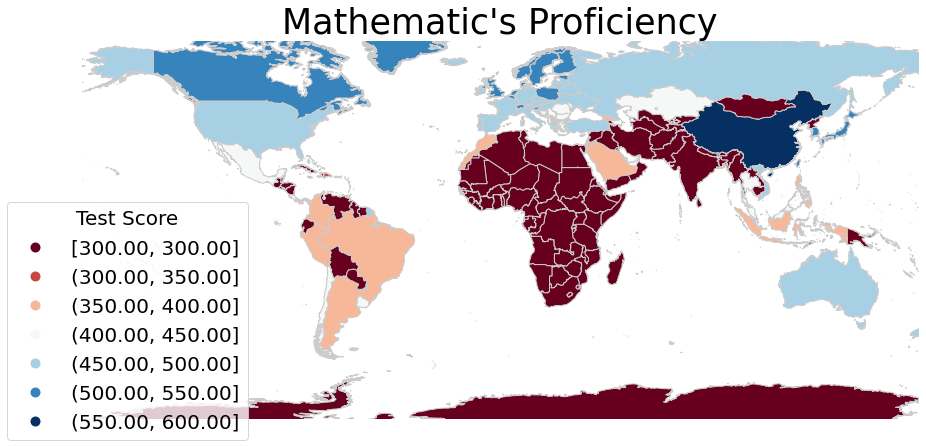

In [69]:
#sns.set_style("whitegrid")
fig, ax = plt.subplots(1,figsize=(15, 10))
ax.axis('off')
ax.set_title("Mathematic's Proficiency", fontdict={'fontsize': '35', 'fontweight' : '3'})
variable = 'Avg_score'

#merged.plot(variable, cmap='coolwarm_r',categorical=True,
 #                       k=5,
  #                       edgecolor = '0.8', linewidth=0.7, ax=ax,legend= True)

#merged.plot(variable, cmap='coolwarm',scheme='UserDefined',classification_kwds=dict(bins=[300,325,416,463,499,591]),
                     #edgecolor = '0.8', linewidth=0.7, ax=ax,legend= True)


#merged.plot(variable, cmap='coolwarm',categorical=True,k=10,
 #                    edgecolor = '0.8', linewidth=0.7, ax=ax,legend= True)

merged.plot(column='Avg_score', cmap='RdBu', scheme="User_Defined", 
         legend=True, edgecolor='0.8',classification_kwds=dict(bins=[300,350,400,450,500,550,600]),
         ax=ax,label='Ranking')
ax.set_xlim(minx+10, maxx-10)
ax.set_ylim(miny+10, maxy-10)
leg = ax.get_legend()
plt.rc('legend', fontsize=20)
leg.set_title('Test Score', prop={'size': 20})
leg.set_bbox_to_anchor((0.01, 0.4, 0.2, 0.2))

plt.savefig('Pisa Mathematics.png',bbox_inches='tight')
#plt.show()

import geopandas as gpd
print(gpd.__version__)   ## 0.5
import numpy as np; np.random.seed(42)
import matplotlib.pyplot as plt 

gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) 
gdf['quant']=np.random.rand(len(gdf))*100-20

fig, ax = plt.subplots()

merged.plot(column='Avg_score', cmap='RdBu', scheme="User_Defined", 
         legend=True, classification_kwds=dict(bins=[300,350,400,450,500,550,600]),
         ax=ax)

plt.show()


# Happiness Index

In [70]:
import os

fp = os.path.join('Happiness_index_2017_2019', 'WHR20_DataForFigure2.1.xls')


Hap_df = pd.read_excel(fp)  
#df_election.reset_index(drop=True)
Hap_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900826,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


### basic EDA

In [71]:
Hap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

In [72]:
Hap_df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,0.053538,5.578175,5.368304,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120,1.972317,0.868771,1.155607,0.692869,0.463583,0.189375,0.130718,1.972317
std,1.11227,0.018183,1.096823,1.128631,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172,0.000000,0.372416,0.286866,0.254094,0.141172,0.100401,0.113097,0.563638
min,2.56690,0.025902,2.628270,2.505530,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784,1.972317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257241
25%,4.72410,0.040698,4.826248,4.603149,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019,1.972317,0.575862,0.986718,0.495443,0.381457,0.115006,0.055805,1.629928
50%,5.51500,0.050606,5.607728,5.430644,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122,1.972317,0.918549,1.203987,0.759818,0.483293,0.176745,0.098435,2.046272
75%,6.22850,0.060677,6.363886,6.138881,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151,1.972317,1.169229,1.387139,0.867249,0.576665,0.255510,0.163064,2.350267
max,7.80870,0.120590,7.869766,7.747634,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585,1.972317,1.536676,1.547567,1.137814,0.693270,0.569814,0.533162,3.440810


### cleaning the text

In [73]:
def Clean_text(DF,column_name):
    DF[column_name] = DF[column_name].str.lower()
    DF[column_name]=DF[column_name].str.strip()
    return DF[column_name]



In [74]:
Hap_df = Hap_df[['Country name','Ladder score']]
Hap_df['Country'] = Clean_text(Hap_df,'Country name')
Hap_df.drop(labels='Country name',axis=1,inplace=True)

In [75]:
Hap_df.head()

,Ladder score,Country
0,7.8087,finland
1,7.6456,denmark
2,7.5599,switzerland
3,7.5045,iceland
4,7.4880,norway


### changing the country names in Hap_df

In [76]:
Hap_df[Hap_df['Country']=='united states'].index
Hap_df['Country'].iloc[17]='united states of america'
Hap_df[Hap_df['Country']=='taiwan province of china'].index
Hap_df['Country'].iloc[24]='taiwan'
Hap_df[Hap_df['Country']=='hong kong s.a.r. of china'].index
Hap_df['Country'].iloc[77]='hong kong'
Hap_df[Hap_df['Country']=='congo (brazzaville)'].index
Hap_df['Country'].iloc[87]='republic of the congo'
Hap_df[Hap_df['Country']=='north cyprus'].index
Hap_df['Country'].iloc[75]='cyprus'
Hap_df[Hap_df['Country']=='congo (kinshasa)'].index
Hap_df['Country'].iloc[130]='democratic republic of the congo'

/home/vasanth/anaconda3/envs/DS/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


### countries that don't match

In [77]:
Not_matching = []
Hap_df['Country'].apply(lambda x: matching_country(x))
Not_matching

['hong kong', 'palestinian territories']

### Merging the map and happiness

In [78]:
merged_hap = map_df.set_index('country').join(Hap_df.set_index('Country'))
#merged_hap.dropna()

In [79]:
merged_hap

,geometry,Ladder score
afghanistan,"POLYGON ((71.04980 38.40866, 71.05714 38.40903...",2.5669
albania,"POLYGON ((19.74777 42.57890, 19.74601 42.57993...",4.8827
algeria,"POLYGON ((8.60251 36.93951, 8.60566 36.91305, ...",5.0051
andorra,"POLYGON ((1.70701 42.50278, 1.69750 42.49446, ...",NaN
angola,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...",NaN
...,...,...
vietnam,"MULTIPOLYGON (((106.66871 8.75349, 106.66586 8...",5.3535
western sahara,"POLYGON ((-8.75256 27.66144, -8.68239 27.66144...",NaN
yemen,"MULTIPOLYGON (((53.30824 12.11839, 53.31027 12...",3.5274
zambia,"POLYGON ((31.11984 -8.61663, 31.14102 -8.60619...",3.7594


### Filling empty values on happiness data

In [80]:
merged_hap['Ladder score'].fillna(value=0,inplace=True)


In [81]:
type(merged_hap['Ladder score'][0])

numpy.float64

In [82]:
merged_hap['Ladder score'] = merged_hap['Ladder score'].astype(float)
merged_hap

,geometry,Ladder score
afghanistan,"POLYGON ((71.04980 38.40866, 71.05714 38.40903...",2.5669
albania,"POLYGON ((19.74777 42.57890, 19.74601 42.57993...",4.8827
algeria,"POLYGON ((8.60251 36.93951, 8.60566 36.91305, ...",5.0051
andorra,"POLYGON ((1.70701 42.50278, 1.69750 42.49446, ...",0.0000
angola,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...",0.0000
...,...,...
vietnam,"MULTIPOLYGON (((106.66871 8.75349, 106.66586 8...",5.3535
western sahara,"POLYGON ((-8.75256 27.66144, -8.68239 27.66144...",0.0000
yemen,"MULTIPOLYGON (((53.30824 12.11839, 53.31027 12...",3.5274
zambia,"POLYGON ((31.11984 -8.61663, 31.14102 -8.60619...",3.7594


In [83]:
Hap_df.describe()

,Ladder score
count,153.00000
mean,5.47324
std,1.11227
min,2.56690
25%,4.72410
50%,5.51500
75%,6.22850
max,7.80870


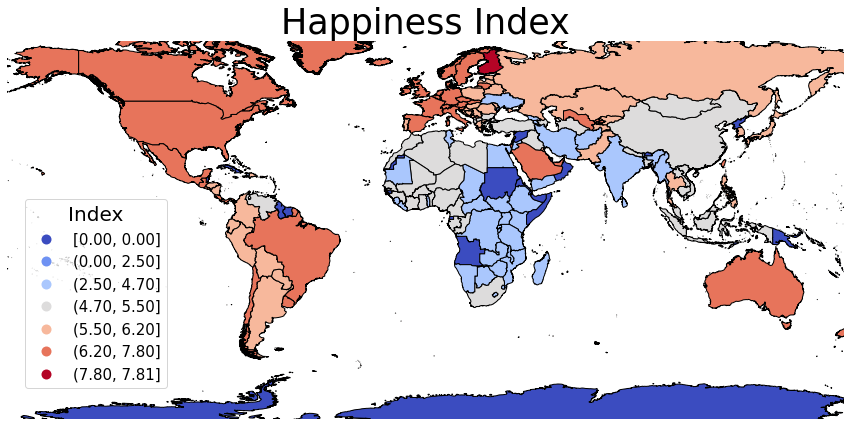

In [85]:
#sns.set_style("whitegrid")
fig, ax = plt.subplots(1,figsize=(15, 10))
ax.axis('off')
ax.set_title('Happiness Index', fontdict={'fontsize': '35', 'fontweight' : '3'})
variable = 'Ladder score'

#merged.plot(variable, cmap='coolwarm_r',categorical=True,
 #                       k=5,
  #                       edgecolor = '0.8', linewidth=0.7, ax=ax,legend= True)

#merged_hap.plot(column=variable, cmap='coolwarm',scheme='UserDefined',classification_kwds=dict(bins=[0,2.5,4.7,5.5,6.2,7.8]),
 #                    edgecolor = '0.8', linewidth=0.7, ax=ax,legend= True)

merged_hap.plot(column=variable, cmap='coolwarm', scheme="User_Defined", 
         legend=True, edgecolor='black',classification_kwds=dict(bins=[0,2.5,4.7,5.5,6.2,7.8]),
         ax=ax)
#merged.plot(variable, cmap='coolwarm',categorical=True,k=10,
 #                    edgecolor = '0.8', linewidth=0.7, ax=ax,legend= True)

#merged_hap.plot(column='Ladder score', cmap='RdBu',legend=True, edgecolor='black',k=20,ax=ax)

ax.set_xlim(minx+10, maxx-10)
ax.set_ylim(miny+10, maxy-10)
leg = ax.get_legend()
plt.rc('legend', fontsize=15)
leg.set_title('Index', prop={'size': 20})
leg.set_bbox_to_anchor((0.1, 0.5, 0.1, 0.1))

plt.savefig('Happiness.png',bbox_inches='tight')
##plt.show()

# Internet Usage

In [42]:
import os
fp =  os.path.join('Internet_users', 'Internet_Users.csv')
internet_df = pd.read_csv(fp)
internet_df = internet_df[['Country or Area','Percentage','Rank']]
def remove_per(percentage):
    percentage = percentage.split()[0]
    percentage=percentage.replace('%','')
    return float(percentage)
def Clean_text(DF,column_name):
    DF[column_name] = DF[column_name].str.lower()
    DF[column_name]=DF[column_name].str.strip()
    return DF[column_name]
internet_df['Percentage']=internet_df['Percentage'].apply(lambda x: remove_per(x))
internet_df['Country or Area'] =Clean_text(internet_df,'Country or Area')
internet_df.head()

,Country or Area,Percentage,Rank
0,china,54.30,116
1,india,34.45,145
2,united states of america,75.23,68
3,brazil,67.47,83
4,japan,90.87,23


In [43]:
internet_df['Percentage'].min()

1.31

In [48]:
map_df.head()
map_df.columns

Index(['country', 'geometry'], dtype='object')

In [49]:

merged_int = map_df.set_index('country').join(internet_df.set_index('Country or Area'))
merged_int['Percentage'].fillna(0,inplace=True)
merged_int.dropna().info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 237 entries, afghanistan to zimbabwe
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geometry    237 non-null    geometry
 1   Percentage  237 non-null    float64 
 2   Rank        237 non-null    object  
dtypes: float64(1), geometry(1), object(1)
memory usage: 7.4+ KB


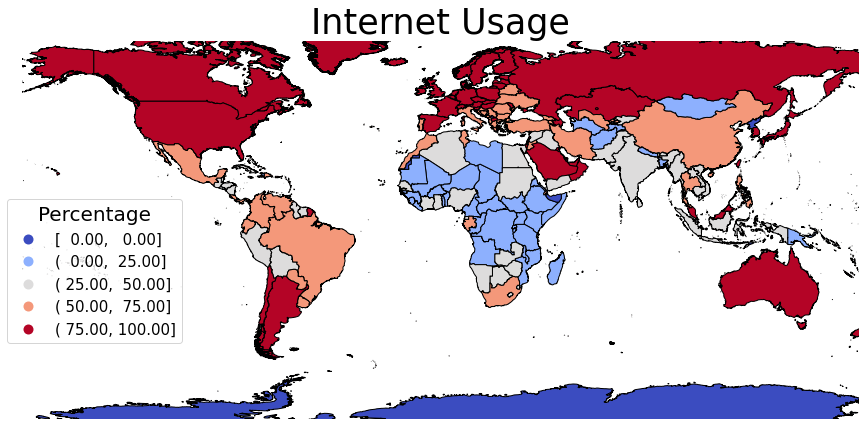

In [87]:
#sns.set_style("whitegrid")
fig, ax = plt.subplots(1,figsize=(15, 10))
ax.axis('off')
ax.set_title('Internet Usage', fontdict={'fontsize': '35', 'fontweight' : '3'})
variable = 'Percentage'



merged_int.plot(column=variable, cmap='coolwarm', scheme="User_Defined", 
         legend=True, edgecolor='black',classification_kwds=dict(bins=[0,25,50,75,100]),
         ax=ax)

ax.set_xlim(minx+10, maxx-10)
ax.set_ylim(miny+10, maxy-10)
leg = ax.get_legend()
plt.rc('legend', fontsize=15)

leg.set_title('Percentage', prop={'size': 20})

leg.set_bbox_to_anchor((0.1, 0.5, 0.1, 0.1))

plt.savefig('Internet_Users',bbox_inches='tight')
##plt.show()

# Correlation on happiness, internet usage and mathematics

In [9]:
def Clean_text(DF,column_name):
    DF[column_name] = DF[column_name].str.lower()
    DF[column_name]=DF[column_name].str.strip()
    return DF[column_name]

In [10]:
def remove_per(percentage):
    percentage = percentage.split()[0]
    percentage=percentage.replace('%','')
    return float(percentage)

In [11]:
import os

fp = os.path.join('Pisa_Ranking', 'pisa_ranking.ods')

pisa_df = read_ods(fp,1,columns=['Index','Country','Avg_score'])
pisa_df['Country'] = Clean_text(pisa_df,'Country') 
pisa_df.drop(columns='Index',inplace= True )
pisa_df.head(3)

,Country,Avg_score
0,china,591.0
1,singapore,569.0
2,macau,558.0


In [12]:
fp =  os.path.join('Internet_users', 'Internet_Users.csv')
internet_df = pd.read_csv(fp)
internet_df = internet_df[['Country or Area','Percentage','Rank']]
internet_df['Percentage']=internet_df['Percentage'].apply(lambda x: remove_per(x))
internet_df['Country or Area'] =Clean_text(internet_df,'Country or Area')
internet_df.head()


,Country or Area,Percentage,Rank
0,china,54.30,116
1,india,34.45,145
2,united states of america,75.23,68
3,brazil,67.47,83
4,japan,90.87,23


In [13]:
fp = os.path.join('Happiness_index_2017_2019', 'WHR20_DataForFigure2.1.xls')

Hap_df = pd.read_excel(fp)  
Hap_df = Hap_df[['Country name','Ladder score','Logged GDP per capita']]
Hap_df['Country'] = Clean_text(Hap_df,'Country name')
Hap_df.drop(labels='Country name',axis=1,inplace=True)
Hap_df.head(3)

,Ladder score,Logged GDP per capita,Country
0,7.8087,10.639267,finland
1,7.6456,10.774001,denmark
2,7.5599,10.979933,switzerland


In [14]:
pisa_df[pisa_df['Country']=='united states'].index
pisa_df['Country'].iloc[37] = 'united states of america'
pisa_df[pisa_df['Country']=='serbia'].index
pisa_df['Country'].iloc[46]

/home/vasanth/anaconda3/envs/DS/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


'serbia'

In [15]:
Hap_df[Hap_df['Country']=='united states'].index
Hap_df['Country'].iloc[17]='united states of america'
Hap_df[Hap_df['Country']=='taiwan province of china'].index
Hap_df['Country'].iloc[24]='taiwan'
Hap_df[Hap_df['Country']=='hong kong s.a.r. of china'].index
Hap_df['Country'].iloc[77]='hong kong'
Hap_df[Hap_df['Country']=='congo (brazzaville)'].index
Hap_df['Country'].iloc[87]='republic of the congo'
Hap_df[Hap_df['Country']=='north cyprus'].index
Hap_df['Country'].iloc[75]='cyprus'
Hap_df[Hap_df['Country']=='congo (kinshasa)'].index
Hap_df['Country'].iloc[130]='democratic republic of the congo'

In [16]:
Not_matching = []
def matching_country(name,country_list=Hap_df['Country'].values):
    if  name not in country_list:
       # print(name)
        Not_matching.append(name)
            #return Not_matching
  

In [17]:
internet_df['Country or Area'].apply(lambda x: matching_country(x))
len(Not_matching)

66

In [18]:
pisa_df['Country'].apply(lambda x: matching_country(x))
Not_matching

['sudan',
 'syria',
 'cuba',
 'angola',
 'oman',
 'palestinian authority',
 'puerto rico',
 'qatar',
 'papua new guinea',
 'djibouti',
 'macau',
 'fiji',
 'the gambia',
 'brunei',
 'bhutan',
 'timor leste',
 'the bahamas',
 'equatorial guinea',
 'cabo verde',
 'somalia',
 'guyana',
 'suriname',
 'barbados',
 'new caledonia',
 'french polynesia',
 'belize',
 'guam',
 'aruba',
 'saint lucia',
 'antigua and barbuda',
 'andorra',
 'guinea-bissau',
 'solomon islands',
 'saint vincent and the grenadines',
 'vanuatu',
 'u.s. virgin islands',
 'eritrea',
 'samoa',
 'grenada',
 'são tomé and príncipe',
 'bermuda',
 'seychelles',
 'dominica',
 'cayman islands',
 'faroe islands',
 'saint kitts and nevis',
 'tonga',
 'greenland',
 'jersey',
 'monaco',
 'micronesia, federated states of',
 'liechtenstein',
 'gibraltar',
 'marshall islands',
 'san marino',
 'kiribati',
 'british virgin islands',
 'anguilla',
 'nauru',
 'tuvalu',
 'saint helena',
 'falkland islands',
 'montserrat',
 'wallis and futuna

In [19]:
get_close_matches('brunei', Hap_df['Country'].values,cutoff=0.3,n=10)


['burundi',
 'benin',
 'russia',
 'guinea',
 'france',
 'brazil',
 'ukraine',
 'tunisia',
 'romania',
 'belgium']

In [20]:
Hap_df.info()
pisa_df.info()
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ladder score           153 non-null    float64
 1   Logged GDP per capita  153 non-null    float64
 2   Country                153 non-null    object 
dtypes: float64(2), object(1)
memory usage: 3.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    79 non-null     object 
 1   Avg_score  79 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  215 non-null    object 
 1   Percentage       215 no

In [21]:
#max_avg_score = pisa_df['Avg_score'].max()
#pisa_df['Avg_score']=pisa_df['Avg_score']/max_avg_score
#max_hap_score = Hap_df['Ladder score'].max()
#Hap_df['Ladder score']=Hap_df['Ladder score']/max_hap_score
#max_int_score = internet_df['Percentage'].max()
#internet_df['Percentage'] = internet_df['Percentage']/max_int_score

### Correlation between Mathematics, Happiness and internet usage

In [32]:
import math
merged_hap_pisa=Hap_df.set_index('Country').join(pisa_df.set_index('Country'))
merged_hap_pisa_int = merged_hap_pisa.join(internet_df.set_index('Country or Area'))
#merged_hap_pisa.fillna(0,inplace=True)
merged_hap_pisa_int.dropna(inplace=True)
merged_hap_pisa_int.drop(labels='Rank',axis=1,inplace=True)

merged_hap_pisa_int.rename(columns={"Ladder score": "Happiness", "Avg_score": "Mathematics","Percentage":"Internet"},inplace=True)
merged_hap_pisa_int['GDP per capita']=merged_hap_pisa_int['Logged GDP per capita'].apply(lambda x: math.exp(x), )
merged_hap_pisa_int.drop(labels='Logged GDP per capita',axis=1,inplace=True)

merged_hap_pisa_int.info()
merged_hap_pisa_int.head()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, albania to vietnam
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Happiness       76 non-null     float64
 1   Mathematics     76 non-null     float64
 2   Internet        76 non-null     float64
 3   GDP per capita  76 non-null     float64
dtypes: float64(4)
memory usage: 3.0+ KB


,Happiness,Mathematics,Internet,GDP per capita
albania,4.8827,437.0,71.85,12307.087600
argentina,5.9747,379.0,75.81,18232.391567
australia,7.2228,491.0,86.54,45278.895209
austria,7.2942,499.0,87.94,46296.590626
azerbaijan,5.1648,420.0,79.00,16118.564714


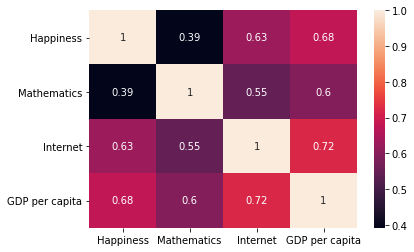

In [33]:
corr_hap_pisa_int = merged_hap_pisa_int.corr(method='pearson')

sns.heatmap(corr_hap_pisa_int,annot=True)
plt.savefig('Correlation_6.png',bbox_inches='tight')

### Correlation between happiness and mathematics

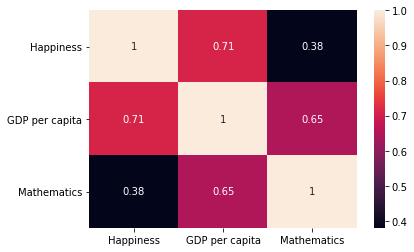

In [24]:
merged_hap_pisa.drop(labels='Logged GDP per capita',axis=1,inplace=True)
merged_hap_pisa.dropna(inplace=True)
merged_hap_pisa.rename(columns={"Ladder score": "Happiness", "Avg_score": "Mathematics","Logged GDP per capita": "GDP per capita"},inplace=True)

corr_hap_pisa =merged_hap_pisa.corr(method='pearson')
sns.heatmap(corr_hap_pisa,annot=True)
#merged_hap_pisa
#plt.savefig('correlation_4',bbox_inches='tight')

In [137]:
Not_matching = []
def matching_country(name,country_list=Hap_df['Country'].values):
    if  name not in country_list:
        print(name)
        Not_matching.append(name)
            #return Not_matching
  

In [138]:

#merged_hap_pisa.reset_index(inplace=True)
#merged_hap_pisa[merged_hap_pisa['Country']=='taiwan'].index
#merged_hap_pisa['Country'][27]
pisa_df['Country'].apply(lambda x: matching_country(x))
Not_matching

macau
brunei
qatar


['macau', 'brunei', 'qatar']

### Correlation between happiness and internet

In [35]:
merged_hap_int=Hap_df.set_index('Country').join(internet_df.set_index('Country or Area'))
#merged_hap_int.drop(labels='Logged GDP per capita',axis=1,inplace=True)
merged_hap_int.drop(labels='Rank',axis=1,inplace=True)

merged_hap_int.rename(columns={"Ladder score": "Happiness", "Percentage": "Internet","Logged GDP per capita": "GDP per capita"},inplace=True)
#merged_hap_int.drop(labels='Happiness',axis=1,inplace=True)
merged_hap_int.drop(labels='GDP per capita',axis=1,inplace=True)


merged_hap_int.dropna(inplace=True)
merged_hap_int
#merged_hap_int.info()


,Happiness,Internet
afghanistan,2.5669,11.45
albania,4.8827,71.85
algeria,5.0051,47.69
argentina,5.9747,75.81
armenia,4.6768,69.72
...,...,...
venezuela,5.0532,64.31
vietnam,5.3535,49.57
yemen,3.5274,26.72
zambia,3.7594,27.85


<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, afghanistan to zimbabwe
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Happiness  150 non-null    float64
 1   Internet   150 non-null    float64
dtypes: float64(2)
memory usage: 3.5+ KB


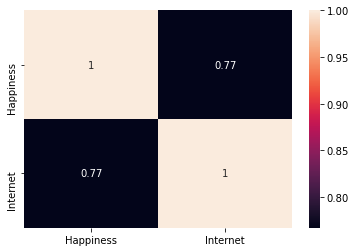

In [37]:
correlation=merged_hap_int.corr(method='pearson')
#merged_hap_int.plot.hist(by='Percentage')
merged_hap_int.info()
sns.heatmap(correlation,annot=True)
#merged_hap.dropna()
plt.savefig('Correlation_7',bbox_inches='tight')

### Correlation between Internet and Mathematics

In [38]:
merged_mat_int=pisa_df.set_index('Country').join(internet_df.set_index('Country or Area'))
#merged_hap_mat.drop(labels='Logged GDP per capita',axis=1,inplace=True)
merged_mat_int.drop(labels='Rank',axis=1,inplace=True)
merged_mat_int.rename(columns={"Avg_score": "Mathematics", "Percentage":"Internet"},inplace=True)


merged_mat_int.dropna(inplace=True)
merged_mat_int.head()

,Mathematics,Internet
Country,,
china,591.0,54.30
singapore,569.0,84.45
macau,558.0,83.17
hong kong,551.0,89.42
taiwan,531.0,92.78


<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, china to dominican republic
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Mathematics  78 non-null     float64
 1   Internet     78 non-null     float64
dtypes: float64(2)
memory usage: 1.8+ KB


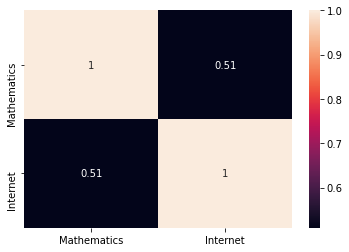

In [39]:
correlation=merged_mat_int.corr(method='pearson')
#merged_hap_int.plot.hist(by='Percentage')
merged_mat_int.info()
sns.heatmap(correlation,annot=True)

#plt.savefig('Correlation_3',bbox_inches='tight')

### Correlation between Internet and GDP per Capita

In [46]:
merged_hap_int=Hap_df.set_index('Country').join(internet_df.set_index('Country or Area'))
#merged_hap_int.drop(labels='Logged GDP per capita',axis=1,inplace=True)
merged_hap_int.drop(labels='Rank',axis=1,inplace=True)

merged_hap_int.rename(columns={"Ladder score": "Happiness", "Percentage": "Internet"},inplace=True)
merged_hap_int.drop(labels='Happiness',axis=1,inplace=True)

merged_hap_int['GDP per capita']=merged_hap_int['Logged GDP per capita'].apply(lambda x: math.exp(x), )
merged_hap_int.drop(labels='Logged GDP per capita',axis=1,inplace=True)

merged_hap_int.dropna(inplace=True)
merged_hap_int
#merged_hap_int.info()


,Internet,GDP per capita
afghanistan,11.45,1742.124430
albania,71.85,12307.087600
algeria,47.69,13876.677343
argentina,75.81,18232.391567
armenia,69.72,8959.558811
...,...,...
venezuela,64.31,7925.127552
vietnam,49.57,6697.874505
yemen,26.72,2344.160580
zambia,27.85,3732.076280


<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, afghanistan to zimbabwe
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Internet        150 non-null    float64
 1   GDP per capita  150 non-null    float64
dtypes: float64(2)
memory usage: 3.5+ KB


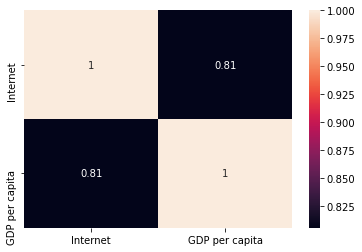

In [47]:
correlation=merged_hap_int.corr(method='pearson')
#merged_hap_int.plot.hist(by='Percentage')
merged_hap_int.info()
sns.heatmap(correlation,annot=True)
#merged_hap.dropna()
plt.savefig('Correlation_8',bbox_inches='tight')

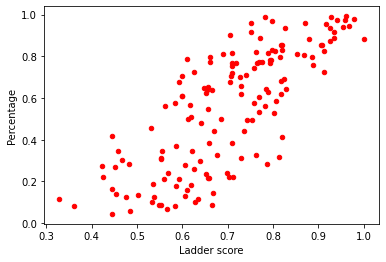

In [88]:
merged_hap_int.plot.scatter(x='Ladder score',y='Percentage',c='Red')

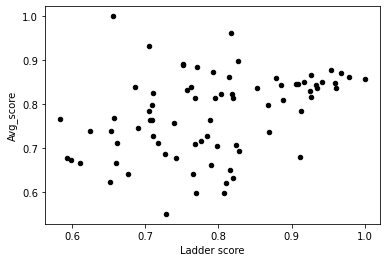

In [89]:
merged_hap_pisa.plot.scatter(x='Ladder score',y='Avg_score',c='Black')